<a href="https://colab.research.google.com/github/Kannaraj523/Carit11/blob/master/Detectron2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# check pytorch installation: 
import torch, torchvision
print(torch.__version__, torch.cuda.is_available())
assert torch.__version__.startswith("1.9")   # please manually install torch 1.9 if Colab changes its default version

1.9.0+cu102 True


In [3]:
!pip install pyyaml==5.1
# This is the current pytorch version on Colab. Uncomment this if Colab changes its pytorch version
# !pip install torch==1.9.0+cu102 torchvision==0.10.0+cu102 -f https://download.pytorch.org/whl/torch_stable.html

# Install detectron2 that matches the above pytorch version
# See https://detectron2.readthedocs.io/tutorials/install.html for instructions
!pip install detectron2 -f https://dl.fbaipublicfiles.com/detectron2/wheels/cu102/torch1.9/index.html
# exit(0)  # After installation, you need to "restart runtime" in Colab. This line can also restart runtime

     |████████████████████████████████| 274 kB 4.2 MB/s 
  Created wheel for pyyaml: filename=PyYAML-5.1-cp37-cp37m-linux_x86_64.whl size=44092 sha256=2be983e2638392254aeadbb8a395701ae2834118acf00c4f0cc3869a6b81d821
  Stored in directory: /root/.cache/pip/wheels/77/f5/10/d00a2bd30928b972790053b5de0c703ca87324f3fead0f2fd9
Successfully built pyyaml
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13
Looking in links: https://dl.fbaipublicfiles.com/detectron2/wheels/cu102/torch1.9/index.html
     |████████████████████████████████| 6.4 MB 641 kB/s 
     |████████████████████████████████| 74 kB 1.9 MB/s 
     |████████████████████████████████| 145 kB 8.7 MB/s 
     |████████████████████████████████| 130 kB 47.5 MB/s 
     |████████████████████████████████| 49 kB 5.3 MB/s 
     |████████████████████████████████| 747 kB 38.1 MB/s 
     |████████████████████████████████| 743 kB 38.0 MB/s 
     |███

In [4]:
import cv2 as cv
import json
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.utils.visualizer import ColorMode
from detectron2 import model_zoo
from detectron2.data import MetadataCatalog, DatasetCatalog
from detectron2.modeling import build_model
import torch
import numpy as np
from PIL import Image



In [7]:
# Some basic setup:
# Setup detectron2 logger
import detectron2
from detectron2.utils.logger import setup_logger
setup_logger()

# import some common libraries
import numpy as np
import os, json, cv2, random
from google.colab.patches import cv2_imshow

# import some common detectron2 utilities
from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog, DatasetCatalog

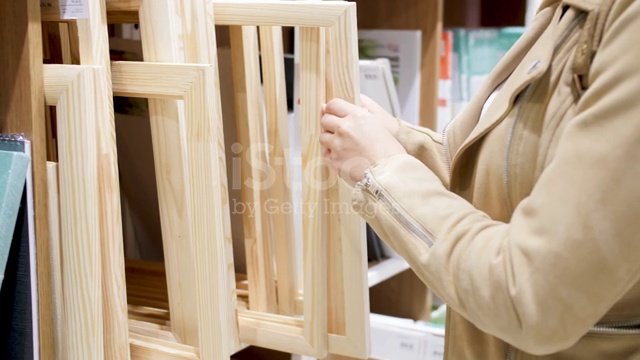

In [11]:
!wget http://images.cocodataset.org/val2017/000000439715.jpg -q -O input.jpg
image = cv.imread("/content/frame10.jpg")
cv2_imshow(image)

In [12]:
import cv2 as cv
import json
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.utils.visualizer import ColorMode
from detectron2 import model_zoo
from detectron2.data import MetadataCatalog, DatasetCatalog
from detectron2.modeling import build_model
import torch
import numpy as np
from PIL import Image

class Detector:

	def __init__(self):

		# set model and test set
		self.model = 'mask_rcnn_R_50_FPN_3x.yaml'

		# obtain detectron2's default config
		self.cfg = get_cfg() 

		# load values from a file
		# self.cfg.merge_from_file("test.yaml")
		self.cfg.merge_from_file(model_zoo.get_config_file("COCO-InstanceSegmentation/"+self.model)) 

		# set device to cpu
		self.cfg.MODEL.DEVICE = "cpu"

		# get weights 
		self.cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-InstanceSegmentation/"+self.model) 
		# self.cfg.MODEL.WEIGHTS = "model_final_f10217.pkl"

		# set the testing threshold for this model
		self.cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.7  

		# build model from weights
		# self.cfg.MODEL.WEIGHTS = self.convert_model_for_inference()

	# build model and convert for inference
	def convert_model_for_inference(self):

		# build model
		model = build_model(self.cfg)

		# save as checkpoint
		torch.save(model.state_dict(), 'checkpoint.pth')

		# return path to inference model
		return 'checkpoint.pth'

	# detectron model
	# adapted from detectron2 colab notebook: https://colab.research.google.com/drive/16jcaJoc6bCFAQ96jDe2HwtXj7BMD_-m5	
	def inference(self, file):

		predictor = DefaultPredictor(self.cfg)
		im = cv.imread(image)
		outputs = predictor(im)
        #Changes made by Kannaraj - Sep 30
    #print(outputs["instances"].pred_classes)
    #print(outputs["instances"].pred_boxes)

		# with open(self.curr_dir+'/data.txt', 'w') as fp:
		# 	json.dump(outputs['instances'], fp)
		# 	# json.dump(cfg.dump(), fp)

		# get metadata
		metadata = MetadataCatalog.get(self.cfg.DATASETS.TRAIN[0])

		# visualise
		v = Visualizer(im[:, :, ::-1], metadata=metadata, scale=1.2)
		v = v.draw_instance_predictions(outputs["instances"].to("cpu"))

		# get image 
		img = Image.fromarray(np.uint8(v.get_image()[:, :, ::-1]))

		# write to jpg
		cv2_imshow(im)

		#return img





In [14]:
cfg = get_cfg()
# add project-specific config (e.g., TensorMask) here if you're not running a model in detectron2's core library
cfg.merge_from_file(model_zoo.get_config_file("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml"))
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5  # set threshold for this model
# Find a model from detectron2's model zoo. You can use the https://dl.fbaipublicfiles... url as well
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml")
predictor = DefaultPredictor(cfg)
outputs = predictor(image)

The checkpoint state_dict contains keys that are not used by the model:
  proposal_generator.anchor_generator.cell_anchors.{0, 1, 2, 3, 4}
/usr/local/lib/python3.7/dist-packages/torch/_tensor.py:575: UserWarning: floor_divide is deprecated, and will be removed in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values.
To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor'). (Triggered internally at  /pytorch/aten/src/ATen/native/BinaryOps.cpp:467.)
  return torch.floor_divide(self, other)
/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:115

In [15]:
# look at the outputs. See https://detectron2.readthedocs.io/tutorials/models.html#model-output-format for specification
print(outputs["instances"].pred_classes)
print(outputs["instances"].pred_boxes)

tensor([ 0, 73], device='cuda:0')
Boxes(tensor([[317.0809,   1.8096, 640.0000, 357.2113],
        [458.1873,  25.3132, 524.8162, 100.6242]], device='cuda:0'))


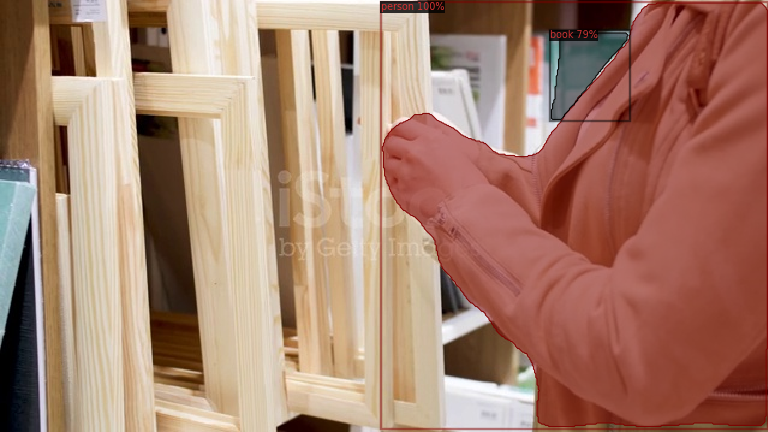

In [17]:
v = Visualizer(image[:, :, ::-1], MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), scale=1.2)
out = v.draw_instance_predictions(outputs["instances"].to("cpu"))
cv2_imshow(out.get_image()[:, :, ::-1])